<a href="https://colab.research.google.com/github/pvh95/Temalabor2/blob/main/bootstrap_on_bs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from google.colab import drive  
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import numpy as np 
import pandas as pd
import random 
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from collections import defaultdict
from copy import deepcopy as dcp 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Dissertation_CEU_BME/balance2018.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
len(df)

420018

In [ ]:
df = df[df['sales_clean'] != 0]
df = df[['sales_clean', 'tanass_clean', 'tax']]

In [ ]:
len(df)

332643

In [ ]:
df = df.dropna(subset=['tanass_clean', 'tax'])

In [ ]:
len(df)

332604

In [ ]:
print('summmary stats for the sales_clean')
sum_stat = df['sales_clean'].describe().apply('{0:.3f}'.format)
print(sum_stat)

summmary stats for the sales_clean
count        332604.000
mean         314854.888
std         8137357.078
min               0.537
25%            4642.000
50%           18034.500
75%           70810.250
max      2371623338.000
Name: sales_clean, dtype: object


In [ ]:
rsd_sales_clean = df['sales_clean'].std() / df['sales_clean'].mean() 
rsd_sales_clean

25.844785575730633

In [ ]:
print('summmary stats for the tanass_clean')
sum_stat = df['tanass_clean'].describe().apply('{0:.3f}'.format)
print(sum_stat)

summmary stats for the tanass_clean
count        332604.000
mean         135862.025
std        11129327.382
min               0.000
25%              70.000
50%            1695.000
75%           13675.250
max      6094569000.000
Name: tanass_clean, dtype: object


In [ ]:
rsd_tanass_clean = df['tanass_clean'].std() / df['tanass_clean'].mean() 
rsd_tanass_clean

81.91639577997489

In [ ]:
print('summmary stats for the tax')
sum_stat = df['tax'].describe().apply('{0:.3f}'.format)
print(sum_stat)

summmary stats for the tax
count      332604.000
mean         1969.049
std        118160.019
min             0.000
25%            18.000
50%           114.000
75%           576.000
max      63639000.000
Name: tax, dtype: object


In [ ]:
rsd_tax = df['tax'].std() / df['tax'].mean() 
rsd_tax

60.008675532991866

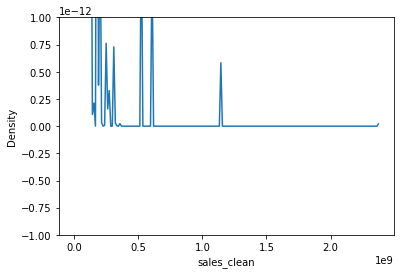

In [ ]:
sns.kdeplot(df["sales_clean"])

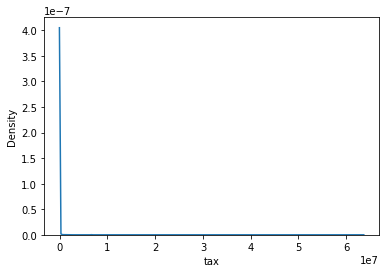

In [ ]:
sns.kdeplot(df["tax"])

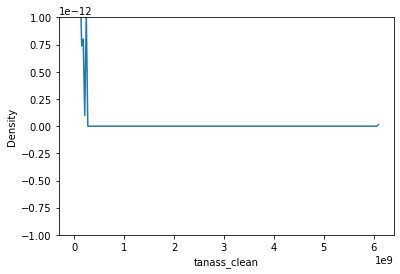

In [ ]:
sns.kdeplot(df["tanass_clean"])

[Text(0.5, 0, 'log transformed sales_clean')]

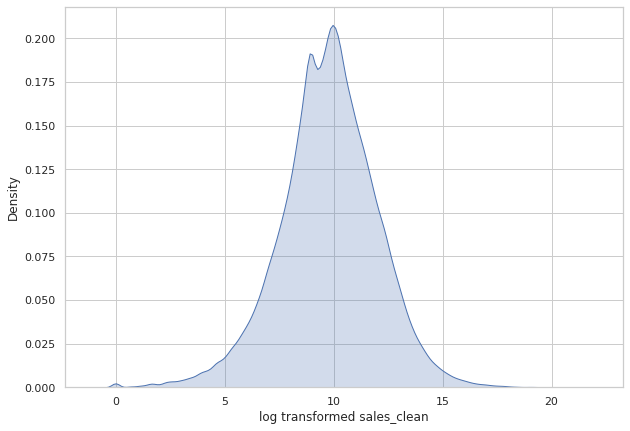

In [ ]:
logSales = np.log(df["sales_clean"])
plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
sns.kdeplot(data=logSales, fill = True).set(xlabel = 'log transformed sales_clean')

[Text(0.5, 0, 'Y-J transformed sales_clean')]

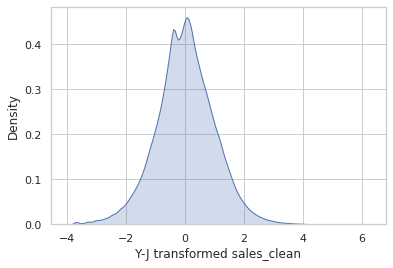

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
trialdf = pd.DataFrame(df, columns= ["sales_clean"])
pt = preprocessing.PowerTransformer(method='yeo-johnson')
modified_sales = pt.fit_transform(trialdf)
sns.kdeplot(data = modified_sales, fill = True, legend = False).set(xlabel = 'Y-J transformed sales_clean')

[Text(0.5, 0, 'Y-J transformed tax')]

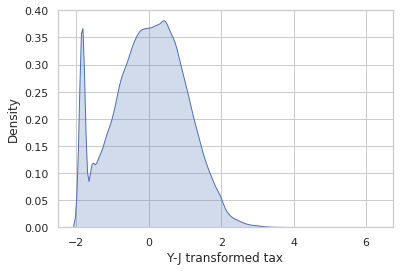

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
trialdf = pd.DataFrame(df, columns= ["tax"])
pt = preprocessing.PowerTransformer(method='yeo-johnson')
modified_tax = pt.fit_transform(trialdf)
sns.kdeplot(data=modified_tax, fill = True, legend = False).set(xlabel = 'Y-J transformed tax')

[Text(0.5, 0, 'Y-J transformed tanass_clean')]

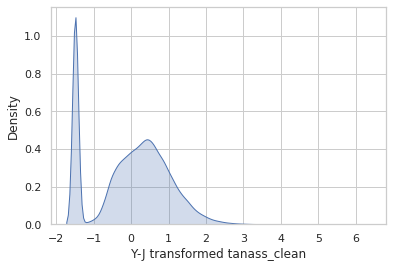

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
trialdf = pd.DataFrame(df, columns= ["tanass_clean"])
pt = preprocessing.PowerTransformer(method='yeo-johnson')
modified_tanass = pt.fit_transform(trialdf)
sns.kdeplot(data=modified_tanass, fill = True, legend = False).set(xlabel = 'Y-J transformed tanass_clean')

In [ ]:
pt = preprocessing.PowerTransformer(method='yeo-johnson')
array_normed = pt.fit_transform(df)
df_normed = pd.DataFrame(array_normed, columns = df.columns, index = df.index)

In [ ]:
array_normed

array([[ 1.29226826,  1.35158472,  1.81267444],
       [ 4.58215979,  3.66771009,  4.60482363],
       [ 3.37312287,  4.29062238,  2.89718024],
       ...,
       [-0.83608459, -0.85244298, -0.84549429],
       [-1.07025499, -1.49173315,  0.28218889],
       [ 0.49840565,  0.83481302, -0.02455371]])

In [ ]:
df_normed

,sales_clean,tanass_clean,tax
0,1.292268,1.351585,1.812674
1,4.582160,3.667710,4.604824
2,3.373123,4.290622,2.897180
3,-1.440657,2.277608,-1.846307
4,0.488393,0.872971,1.768322
...,...,...,...
420013,0.165346,0.185727,-0.257573
420014,0.054051,-0.135997,0.061400
420015,-0.836085,-0.852443,-0.845494
420016,-1.070255,-1.491733,0.282189


# Population

In [ ]:
print('summmary stats for the normed sales_clean')
sum_stat = df_normed['sales_clean'].describe().apply('{0:.3f}'.format)
print(sum_stat)

summmary stats for the normed sales_clean
count    332604.000
mean         -0.000
std           1.000
min          -3.799
25%          -0.604
50%          -0.003
75%           0.622
max           6.070
Name: sales_clean, dtype: object


In [ ]:
print('summmary stats for the normed tanass_clean')
sum_stat = df_normed['tanass_clean'].describe().apply('{0:.3f}'.format)
print(sum_stat)

summmary stats for the normed tanass_clean
count    332604.000
mean         -0.000
std           1.000
min          -1.492
25%          -0.643
50%           0.124
75%           0.703
max           6.158
Name: tanass_clean, dtype: object


In [ ]:
print('summmary stats for the normed tax')
sum_stat = df_normed['tax'].describe().apply('{0:.3f}'.format)
print(sum_stat)

summmary stats for the normed tax
count    332604.000
mean         -0.000
std           1.000
min          -1.846
25%          -0.694
50%           0.037
75%           0.710
max           6.082
Name: tax, dtype: object


In [ ]:
X = sm.add_constant(df_normed.iloc[:,1:], prepend = True)
ols_model = sm.OLS(df_normed['sales_clean'], X)
ols_results = ols_model.fit()

In [ ]:
ols_results.params

const          -2.320193e-17
tanass_clean    3.324291e-01
tax             5.653771e-01
dtype: float64

In [ ]:
ols_results.rsquared

0.5691217992587185

In [ ]:
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:            sales_clean   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                 2.197e+05
Date:                Tue, 11 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:44:34   Log-Likelihood:            -3.3193e+05
No. Observations:              332604   AIC:                         6.639e+05
Df Residuals:                  332601   BIC:                         6.639e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -2.32e-17      0.001  -2.04e-14   

In [ ]:
df_normed.corr()

,sales_clean,tanass_clean,tax
sales_clean,1.000000,0.541438,0.688270
tanass_clean,0.541438,1.000000,0.369681
tax,0.688270,0.369681,1.000000


In [ ]:
df_normed['sales_clean'].corr(df_normed['tanass_clean'])

0.5414382274710408

# Bootstrapping


In [ ]:
from collections import defaultdict
my_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(dict))))

In [ ]:
sample_size_lst = [10, 50, 100, 200, 500, 1000, 2000, 3500, 5000, 6500, 8000, 10000]
reps_lst = [10, 100, 1000, 10000]

In [ ]:
def create_empty_df(column_names):
    df = pd.DataFrame(columns = column_names)
    
    return df 

In [ ]:
sample_dict = dict()
bootstrap_sample_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
estimator_lst =  ['xbar_sales', 'std_sales', 'med_sales', 
                  'corr_sales_tanass', 'corr_sales_tax', 'corr_tanass_tax', 
                  'ols_tanass', 'ols_tax', 'ols_r2']


for ss in sample_size_lst: 
    sample_dict[ss] = None

for ss in sample_size_lst: 
    for reps in reps_lst:
        for estim in estimator_lst:
            bootstrap_sample_dict[ss][reps][estim] = None


In [ ]:
#### With reps and confidence interval 
encompassing_df = None

for ss in sample_size_lst:
 
    sample_from_pop = df_normed.sample(n=ss, replace=False, random_state=42)
    sample_dict[ss] = sample_from_pop

    xbar_sales = np.mean(sample_from_pop['sales_clean'])
    std_sales = np.std(sample_from_pop['sales_clean'])
    med_sales = np.median(sample_from_pop['sales_clean']) 

    corr_sales_tanass = sample_from_pop['sales_clean'].corr(sample_from_pop['tanass_clean'])
    corr_sales_tax = sample_from_pop['sales_clean'].corr(sample_from_pop['tax'])
    corr_tanass_tax = sample_from_pop['tanass_clean'].corr(sample_from_pop['tax'])

    X = sm.add_constant(sample_from_pop.iloc[:,1:], prepend = True)
    ols_results = sm.OLS(sample_from_pop['sales_clean'], X).fit()

    ols_tanass = ols_results.params[1]
    ols_tax = ols_results.params[2]
    ols_r2 = ols_results.rsquared

    for reps in reps_lst:

        sample_mean_sales = []
        sample_std_sales = [] 
        sample_median_sales = []

        sample_corr_sales_tanass = []
        sample_corr_sales_tax = []
        sample_corr_tanass_tax = []

        sample_ols_tanass = [] 
        sample_ols_tax = []
        sample_ols_r2 = []

        for _ in range(reps):
            resample_df = sample_from_pop.sample(n=ss, replace=True)

            sample_mean_sales.append(np.mean(resample_df['sales_clean']))
            sample_std_sales.append(np.std(resample_df['sales_clean']))
            sample_median_sales.append(np.median(resample_df['sales_clean']))

            sample_corr_sales_tanass.append(resample_df['sales_clean'].corr(resample_df['tanass_clean']))
            sample_corr_sales_tax.append(resample_df['sales_clean'].corr(resample_df['tax']))
            sample_corr_tanass_tax.append(resample_df['tanass_clean'].corr(resample_df['tax']))


            X_resample = sm.add_constant(resample_df.iloc[:,1:], prepend = True)
            ols_results_resample = sm.OLS(resample_df['sales_clean'], X_resample).fit()

            sample_ols_tanass.append(ols_results_resample.params[1])
            sample_ols_tax.append(ols_results_resample.params[2])
            sample_ols_r2.append(ols_results_resample.rsquared)

        ### Converting lists to arrays
        sample_mean_sales = np.asarray(sample_mean_sales)
        sample_std_sales = np.asarray(sample_std_sales)
        sample_median_sales = np.asarray(sample_median_sales)

        sample_corr_sales_tanass = np.asarray(sample_corr_sales_tanass)
        sample_corr_sales_tax = np.asarray(sample_corr_sales_tax)
        sample_corr_tanass_tax = np.asarray(sample_corr_tanass_tax)

        sample_ols_tanass = np.asarray(sample_ols_tanass)
        sample_ols_tax = np.asarray(sample_ols_tax)
        sample_ols_r2 = np.asarray(sample_ols_r2)

        ### Store in the dict
        bootstrap_sample_dict[ss][reps]['xbar_sales'] = sample_mean_sales
        bootstrap_sample_dict[ss][reps]['std_sales'] = sample_std_sales
        bootstrap_sample_dict[ss][reps]['med_sales'] = sample_median_sales

        bootstrap_sample_dict[ss][reps]['corr_sales_tanass'] = sample_corr_sales_tanass
        bootstrap_sample_dict[ss][reps]['corr_sales_tax'] = sample_corr_sales_tax
        bootstrap_sample_dict[ss][reps]['corr_tanass_tax'] = sample_corr_tanass_tax
        
        bootstrap_sample_dict[ss][reps]['ols_tanass'] = sample_ols_tanass
        bootstrap_sample_dict[ss][reps]['ols_tax'] = sample_ols_tax
        bootstrap_sample_dict[ss][reps]['ols_r2'] = sample_ols_r2


        bs_df = create_empty_df(['Sample_Size', 'Bs_Resample', 'Sample_Facts', 'Statistics/Estimator', 'Mean', '0.025', '0.975', 'Bias', 'SE', 'RMSE'])

        bs_df['Sample_Size'] = [ss for i in range(9)]
        bs_df['Bs_Resample'] = [reps for i in range(9)]
        bs_df['Sample_Facts'] = [xbar_sales, std_sales, med_sales, 
                                corr_sales_tanass, corr_sales_tax, corr_tanass_tax, 
                                ols_tanass, ols_tax, ols_r2]

        bs_df['Statistics/Estimator'] = ['xbar_sales', 'std_sales', 'med_sales', 
                                        'corr_sales_tanass', 'corr_sales_tax', 'corr_tanass_tax', 
                                        'ols_tanass', 'ols_tax', 'ols_r2']

        bs_df['Mean'] = [np.mean(sample_mean_sales), np.mean(sample_std_sales), np.mean(sample_median_sales),
                        np.mean(sample_corr_sales_tanass), np.mean(sample_corr_sales_tax), np.mean(sample_corr_tanass_tax),
                        np.mean(sample_ols_tanass), np.mean(sample_ols_tax), np.mean(sample_ols_r2)]

        bs_df['0.025'] = [np.percentile(sample_mean_sales, 2.5), np.percentile(sample_std_sales, 2.5), np.percentile(sample_median_sales, 2.5),
                          np.percentile(sample_corr_sales_tanass, 2.5), np.percentile(sample_corr_sales_tax, 2.5), np.percentile(sample_corr_tanass_tax, 2.5),
                          np.percentile(sample_ols_tanass, 2.5), np.percentile(sample_ols_tax, 2.5), np.percentile(sample_ols_r2, 2.5)]

        bs_df['0.975'] = [np.percentile(sample_mean_sales, 97.5), np.percentile(sample_std_sales, 97.5), np.percentile(sample_median_sales, 97.5),
                          np.percentile(sample_corr_sales_tanass, 97.5), np.percentile(sample_corr_sales_tax, 97.5), np.percentile(sample_corr_tanass_tax, 97.5),
                          np.percentile(sample_ols_tanass, 97.5), np.percentile(sample_ols_tax, 97.5), np.percentile(sample_ols_r2, 97.5)]
        

        bs_df['Bias'] = [np.abs(xbar_sales-np.mean(sample_mean_sales)), np.abs(std_sales-np.mean(sample_std_sales)), np.abs(med_sales-np.mean(sample_median_sales)),
                        np.abs(corr_sales_tanass-np.mean(sample_corr_sales_tanass)), np.abs(corr_sales_tax-np.mean(sample_corr_sales_tax)), np.abs(corr_tanass_tax-np.mean(sample_corr_tanass_tax)),
                        np.abs(ols_tanass-np.mean(sample_ols_tanass)), np.abs(ols_tax-np.mean(sample_ols_tax)), np.abs(ols_r2-np.mean(sample_ols_r2))]

        bs_df['SE'] = [np.std(sample_mean_sales), np.std(sample_std_sales), np.std(sample_median_sales),
                      np.std(sample_corr_sales_tanass), np.std(sample_corr_sales_tax), np.std(sample_corr_tanass_tax),
                      np.std(sample_ols_tanass), np.std(sample_ols_tax), np.std(sample_ols_r2)]

        bs_df['RMSE'] = [np.sqrt(np.mean((xbar_sales-sample_mean_sales)**2)), np.sqrt(np.mean((std_sales-sample_std_sales)**2)), np.sqrt(np.mean((med_sales-sample_median_sales)**2)),
                        np.sqrt(np.mean((corr_sales_tanass-sample_corr_sales_tanass)**2)), np.sqrt(np.mean((corr_sales_tax-sample_corr_sales_tax)**2)), np.sqrt(np.mean((corr_tanass_tax-sample_corr_tanass_tax)**2)),
                        np.sqrt(np.mean((ols_tanass-sample_ols_tanass)**2)), np.sqrt(np.mean((ols_tax-sample_ols_tax)**2)), np.sqrt(np.mean((ols_r2-sample_ols_r2)**2))] 

        encompassing_df = pd.concat([encompassing_df, bs_df])   


encompassing_df = encompassing_df.reset_index(drop = True)


In [ ]:
def kdeplot_sample_size(figsize, sample_size_lst, sample_dict, *estimators, isFill = False):
    if estimators != ('all', ): 
        estimators = list(estimators)

    else: 
        estimators = list(sample_dict[list(sample_dict.keys())[0]])

    ss_list = dcp(sample_size_lst)
    fig, ax = plt.subplots(nrows=3,ncols=4, figsize=figsize, constrained_layout=True)
    for i in range(3):
        for j in range(4):
            for ss in ss_list:
                sns.kdeplot(data=sample_dict[ss][estimators], palette="muted", fill = isFill, ax=ax[i][j]).set(title=f'Distribution of a sample size {ss}')
                ss_list.remove(ss)
                break

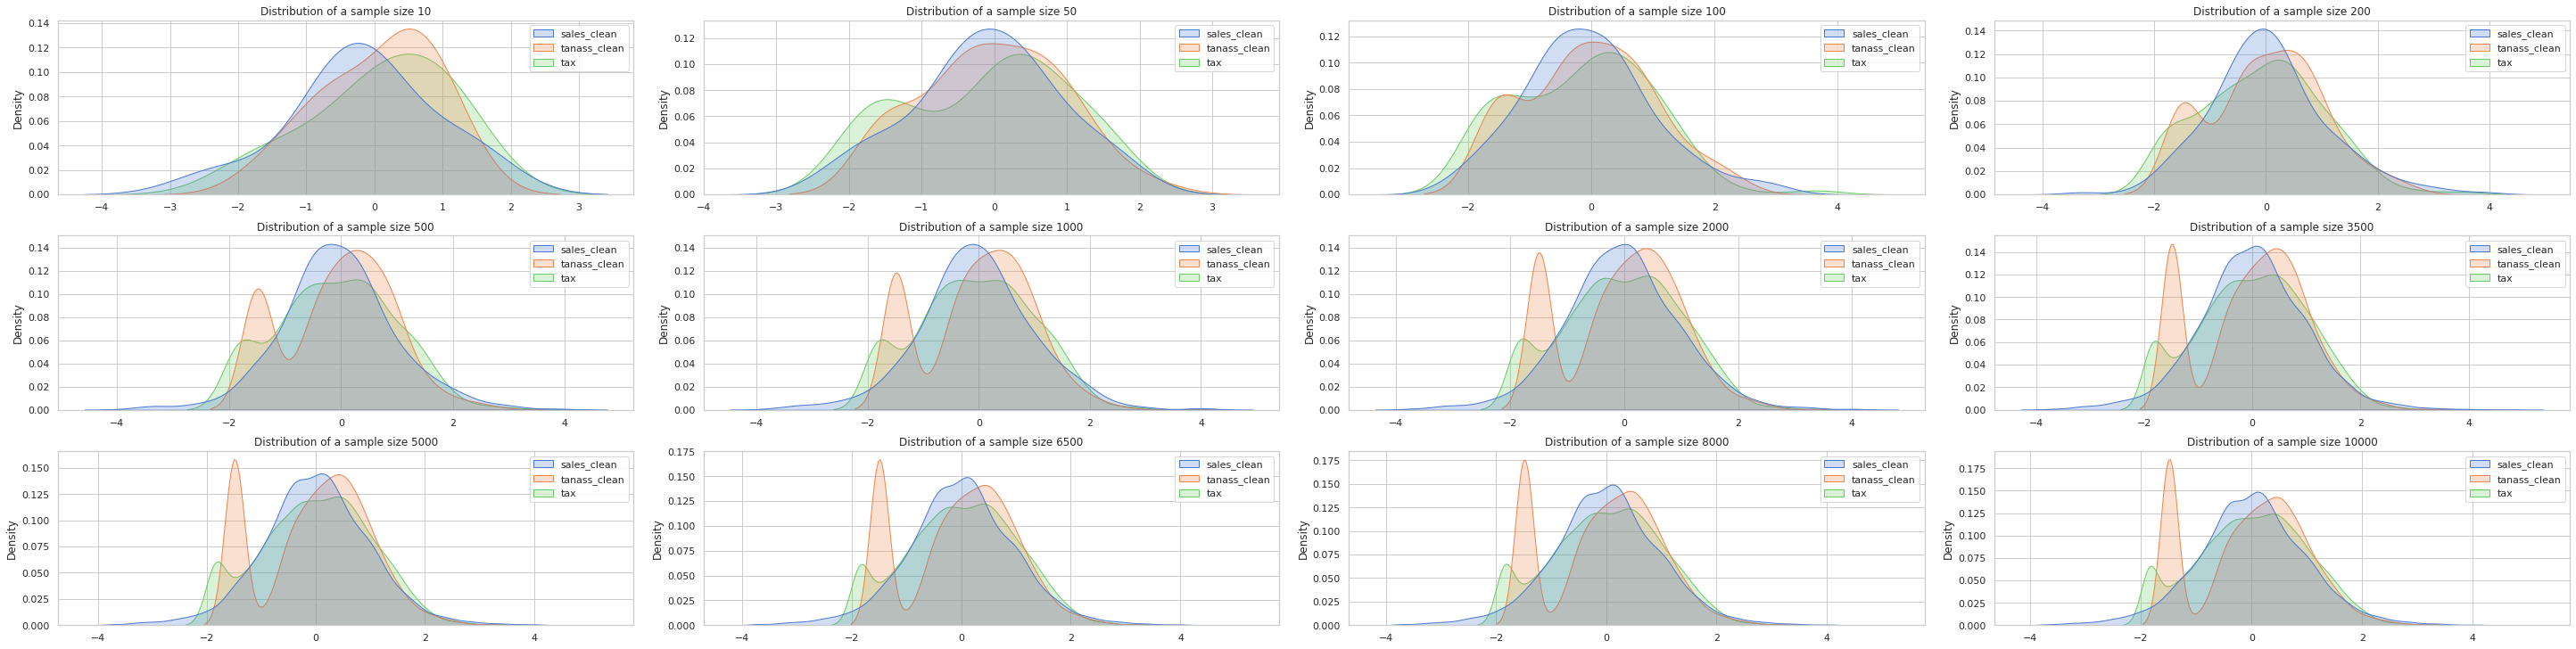

In [ ]:
kdeplot_sample_size((40,10), sample_size_lst, sample_dict, 'all', isFill = True)

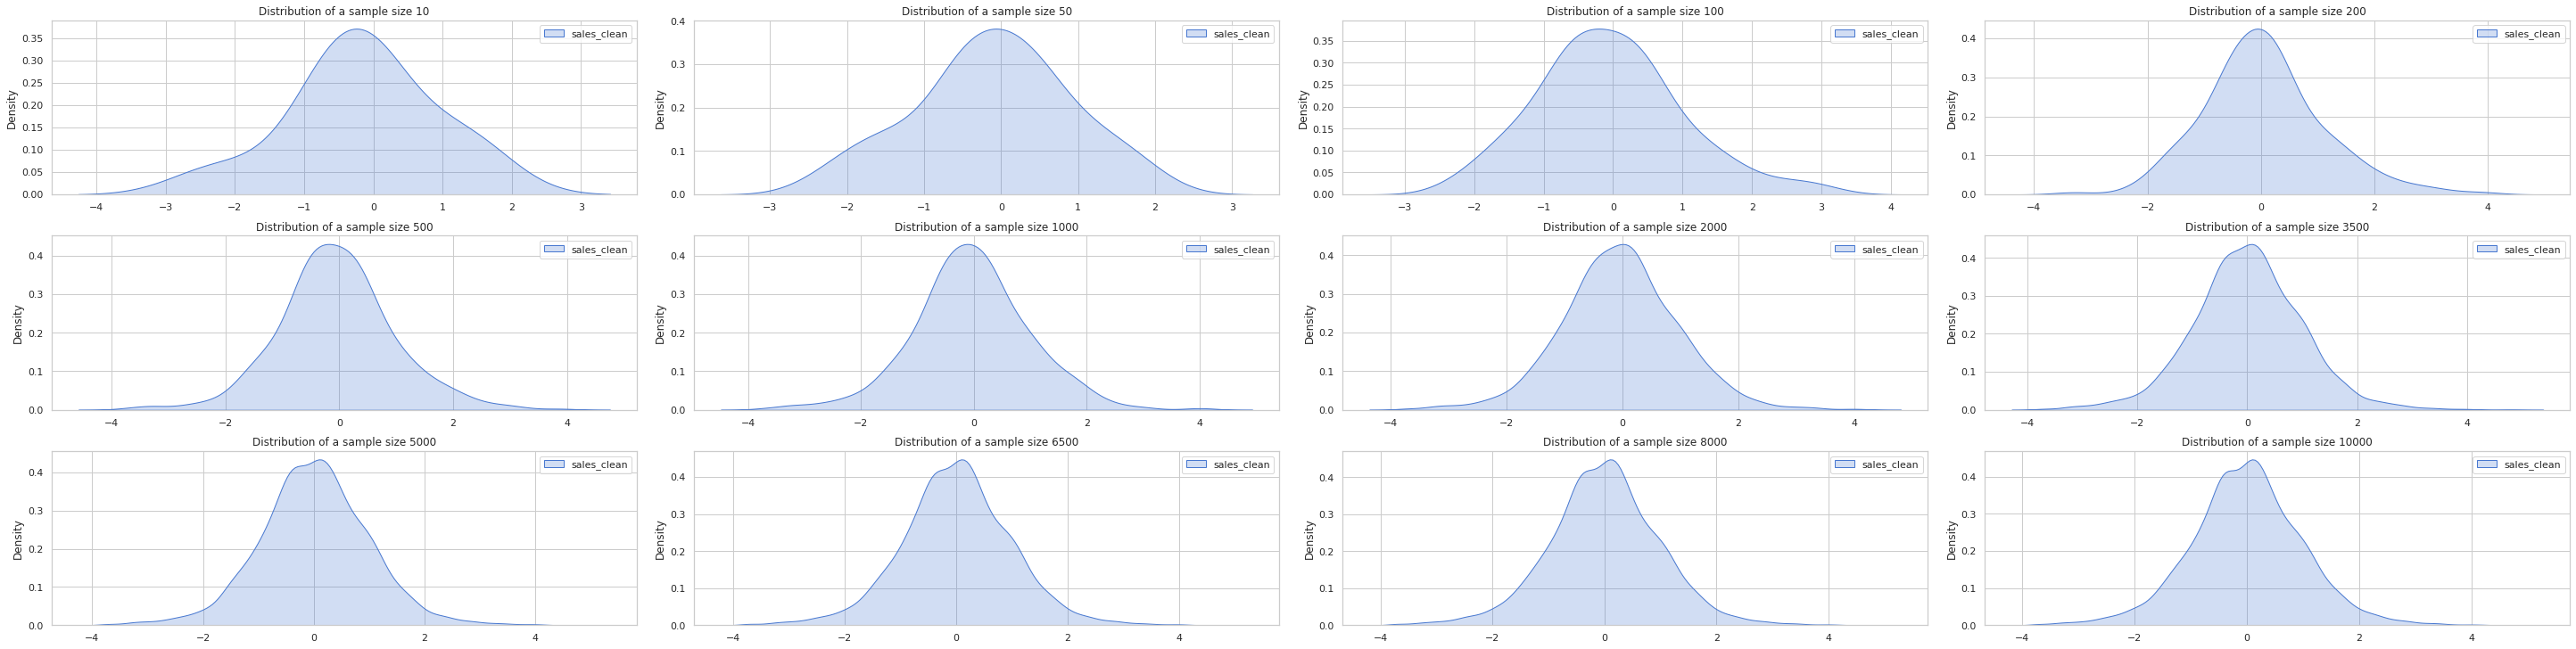

In [ ]:
kdeplot_sample_size((40,10), sample_size_lst, sample_dict, 'sales_clean', isFill='True')

In [ ]:
sample_lst = [10, 100, 1000, 10000]

estim_explainer = {'xbar_sales': 'bootstrapped sales mean',
                   'std_sales': 'bootstrapped sales std', 
                   'med_sales': 'bootstrapped sales median', 
                   'corr_sales_tanass': 'bootstrapped corr bw sales and tanass',
                   'corr_sales_tax': 'bootstrapped corr bw sales and tax',
                   'corr_tanass_tax': 'bootstrapped corr bw tanass and tax', 
                   'ols_tanass': 'bootstrapped tanass param in ols', 
                   'ols_tax': 'bootstrapped tax param in ols',
                   'ols_r2': 'bootstrapped r2 in ols'}

def kdeplot_estimator(figsize, estimator, estim_explainer, bootstrap_sample_dict, sample_size_lst = sample_lst, bs_reps_lst = reps_lst, color=['red', 'blue', 'blue', 'green'], isFill='False'):
    line_position_lower = []
    line_position_higher = []
    line_position_mean = [] 

    row_num = len(sample_size_lst)
    col_num = len(bs_reps_lst)
    fig, axes = plt.subplots(nrows = row_num, ncols=col_num, figsize=figsize, constrained_layout=True)
    for i, ss in enumerate(sample_size_lst):
        for j, bs in enumerate(bs_reps_lst):
            sns.kdeplot(data=bootstrap_sample_dict[ss][bs][estimator], color=color[0], fill = isFill, ax=axes[i][j], legend = False).set(title=f'Sampling distro of the {estim_explainer[estimator]} with SS {ss} and BS {bs}')
            line_position_lower.append(np.percentile(bootstrap_sample_dict[ss][bs][estimator],2.5))
            line_position_higher.append(np.percentile(bootstrap_sample_dict[ss][bs][estimator],97.5))
            line_position_mean.append(np.mean(bootstrap_sample_dict[ss][bs][estimator]))


    for ax, pos_lower, pos_higher, pos_mean in zip(fig.axes, line_position_lower, line_position_higher, line_position_mean): 
        ax.axvline(pos_lower, color = color[1],linewidth=2)
        ax.text(pos_lower, 0, f'2.5th pct = {pos_lower:.3f}', color = 'black', rotation=270, transform=ax.get_xaxis_text1_transform(-30)[0])
        ax.axvline(pos_higher, color = color[2],linewidth=2)
        ax.text(pos_higher, 0, f'97.5th pct = {pos_higher:.3f}', color = 'black', rotation=270, transform=ax.get_xaxis_text1_transform(-30)[0])
        ax.axvline(pos_mean, color = color[3],linewidth=2)
        ax.text(pos_mean, 0, f'Mean = {pos_mean:.3f}', color = 'black', rotation=270, transform=ax.get_xaxis_text1_transform(-30)[0])

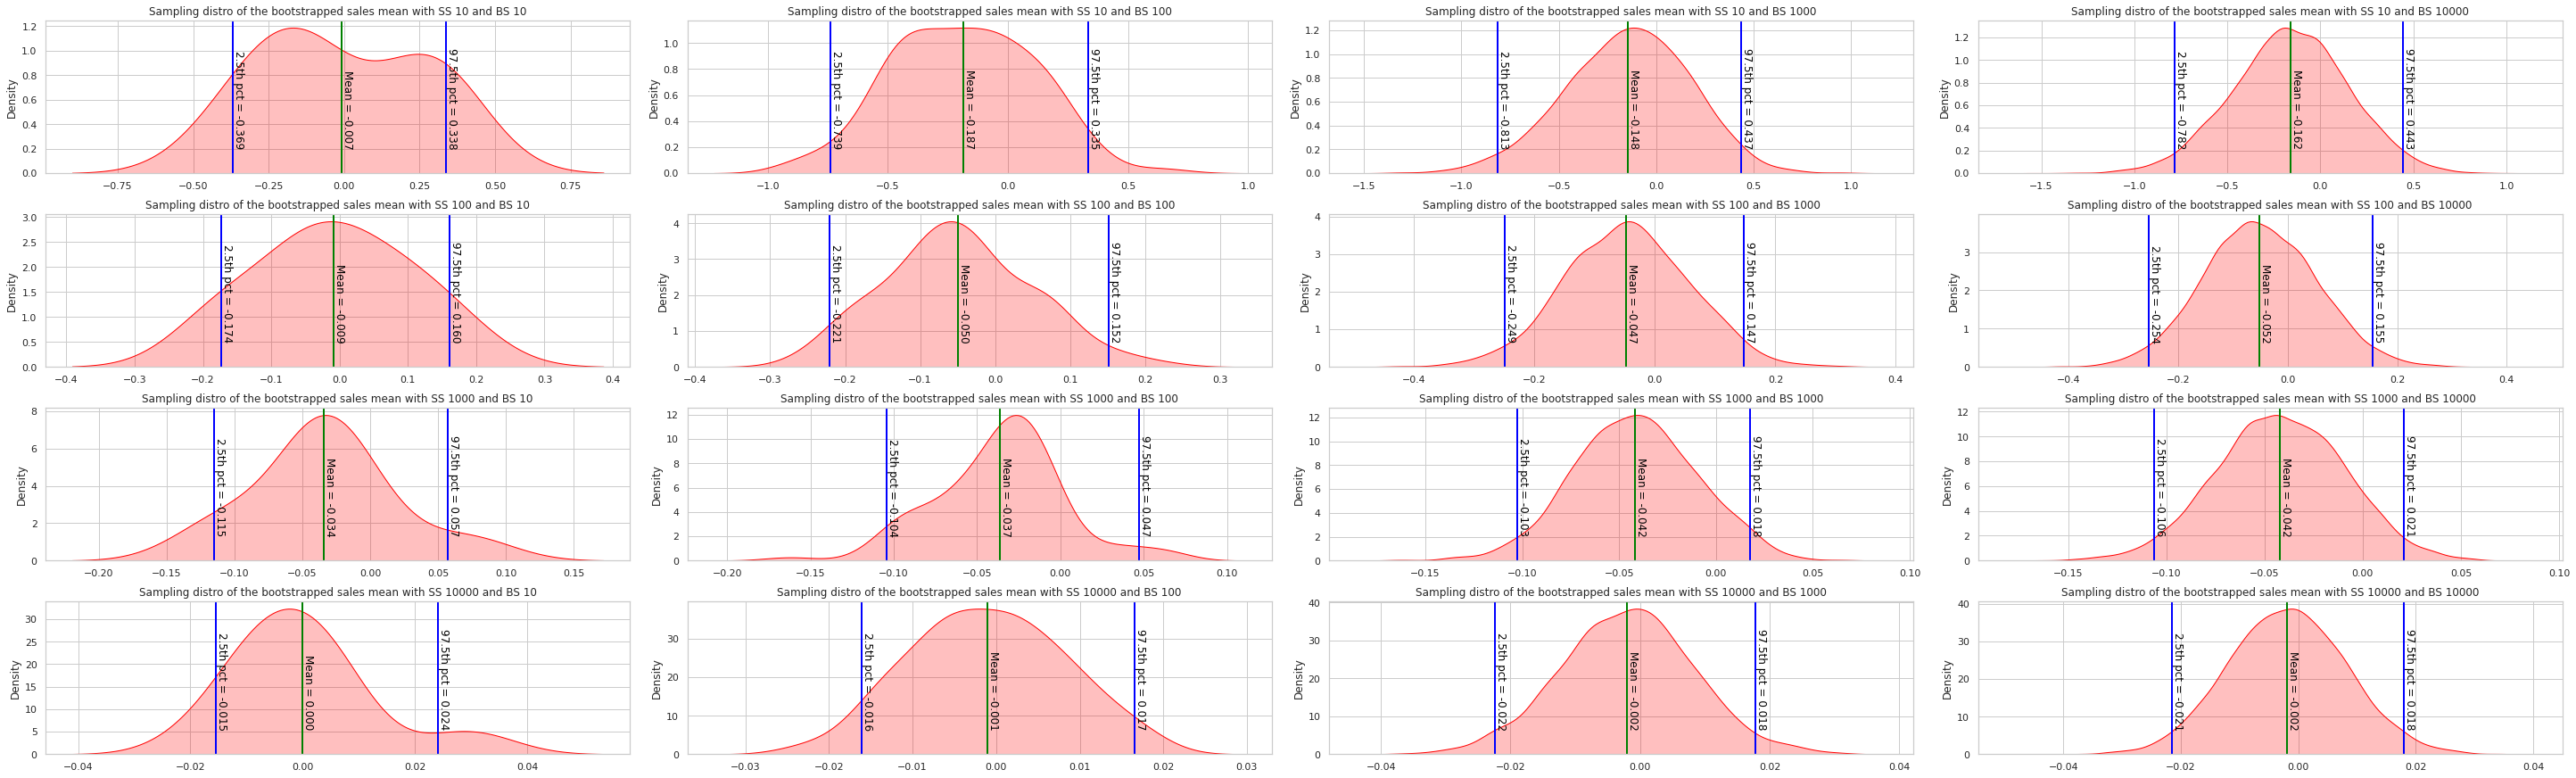

In [ ]:
kdeplot_estimator((40,12), 'xbar_sales', estim_explainer, bootstrap_sample_dict, isFill='True')

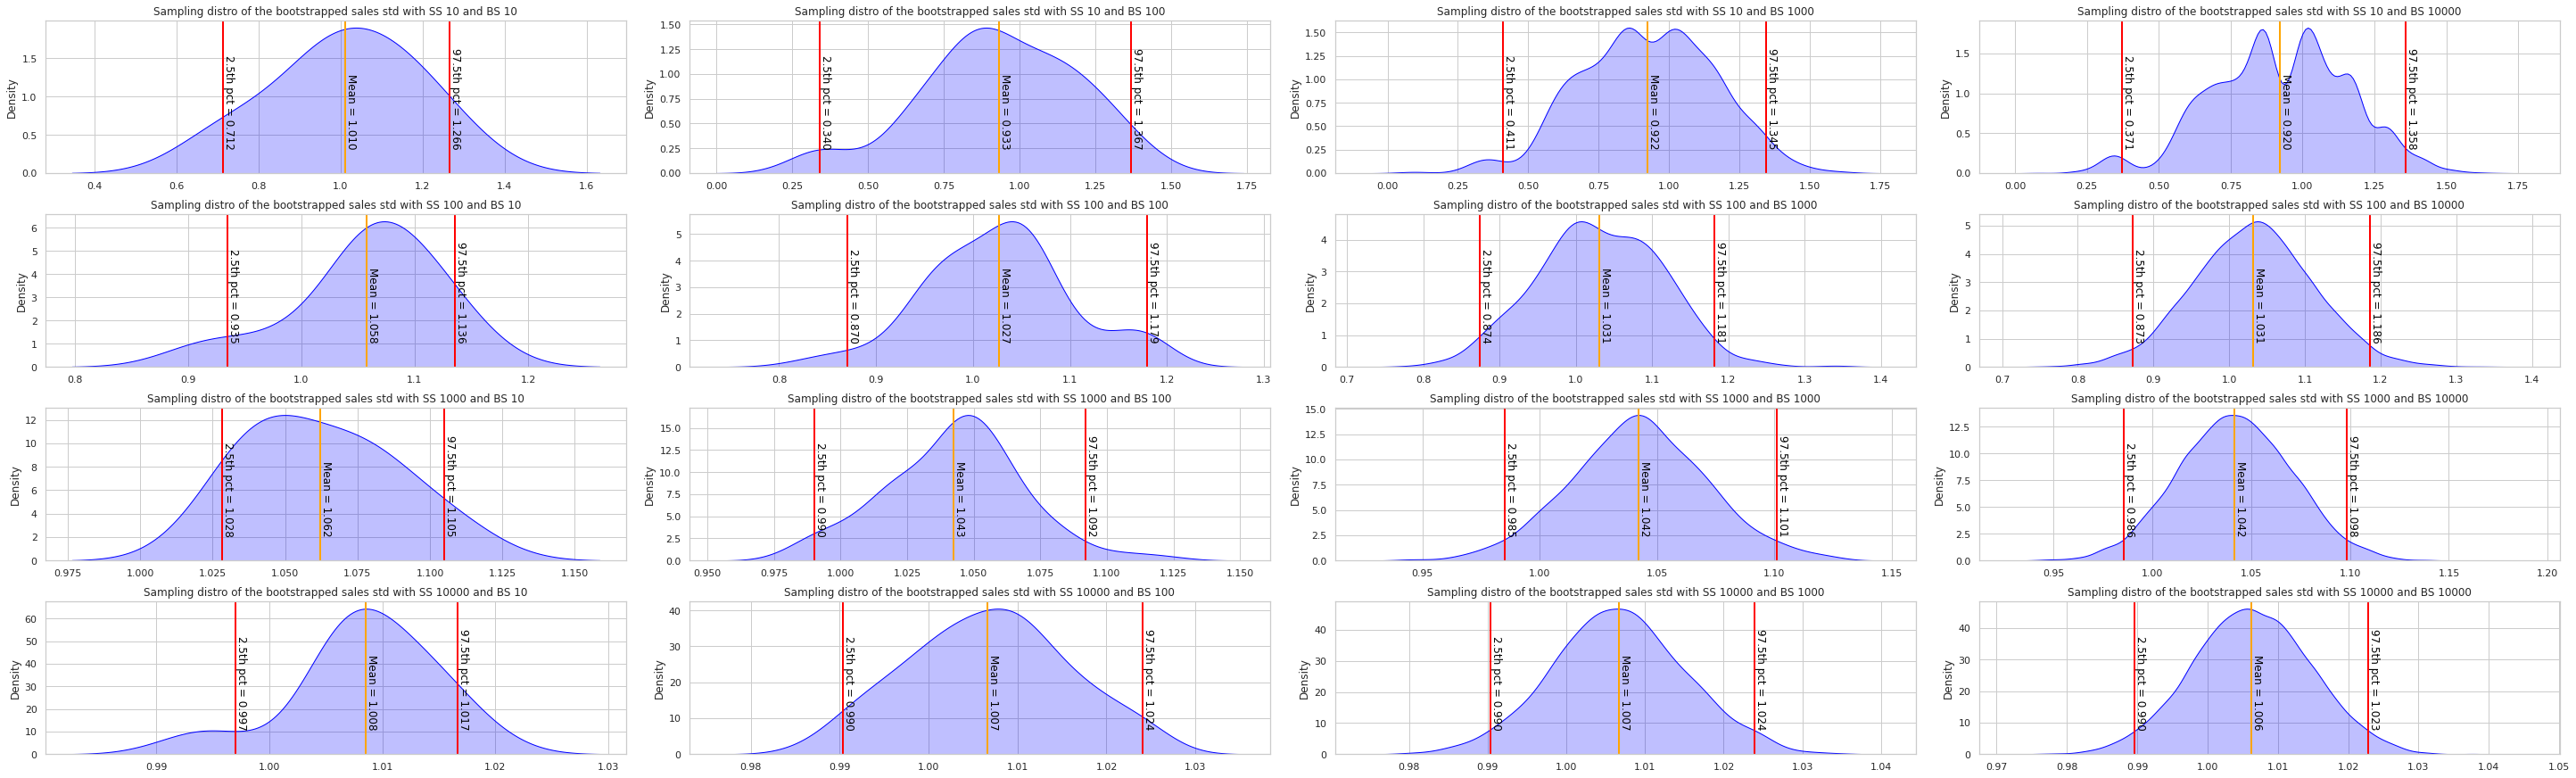

In [ ]:
kdeplot_estimator((40,12), 'std_sales', estim_explainer, bootstrap_sample_dict, color = ['blue', 'red', 'red', 'orange'], isFill='True')

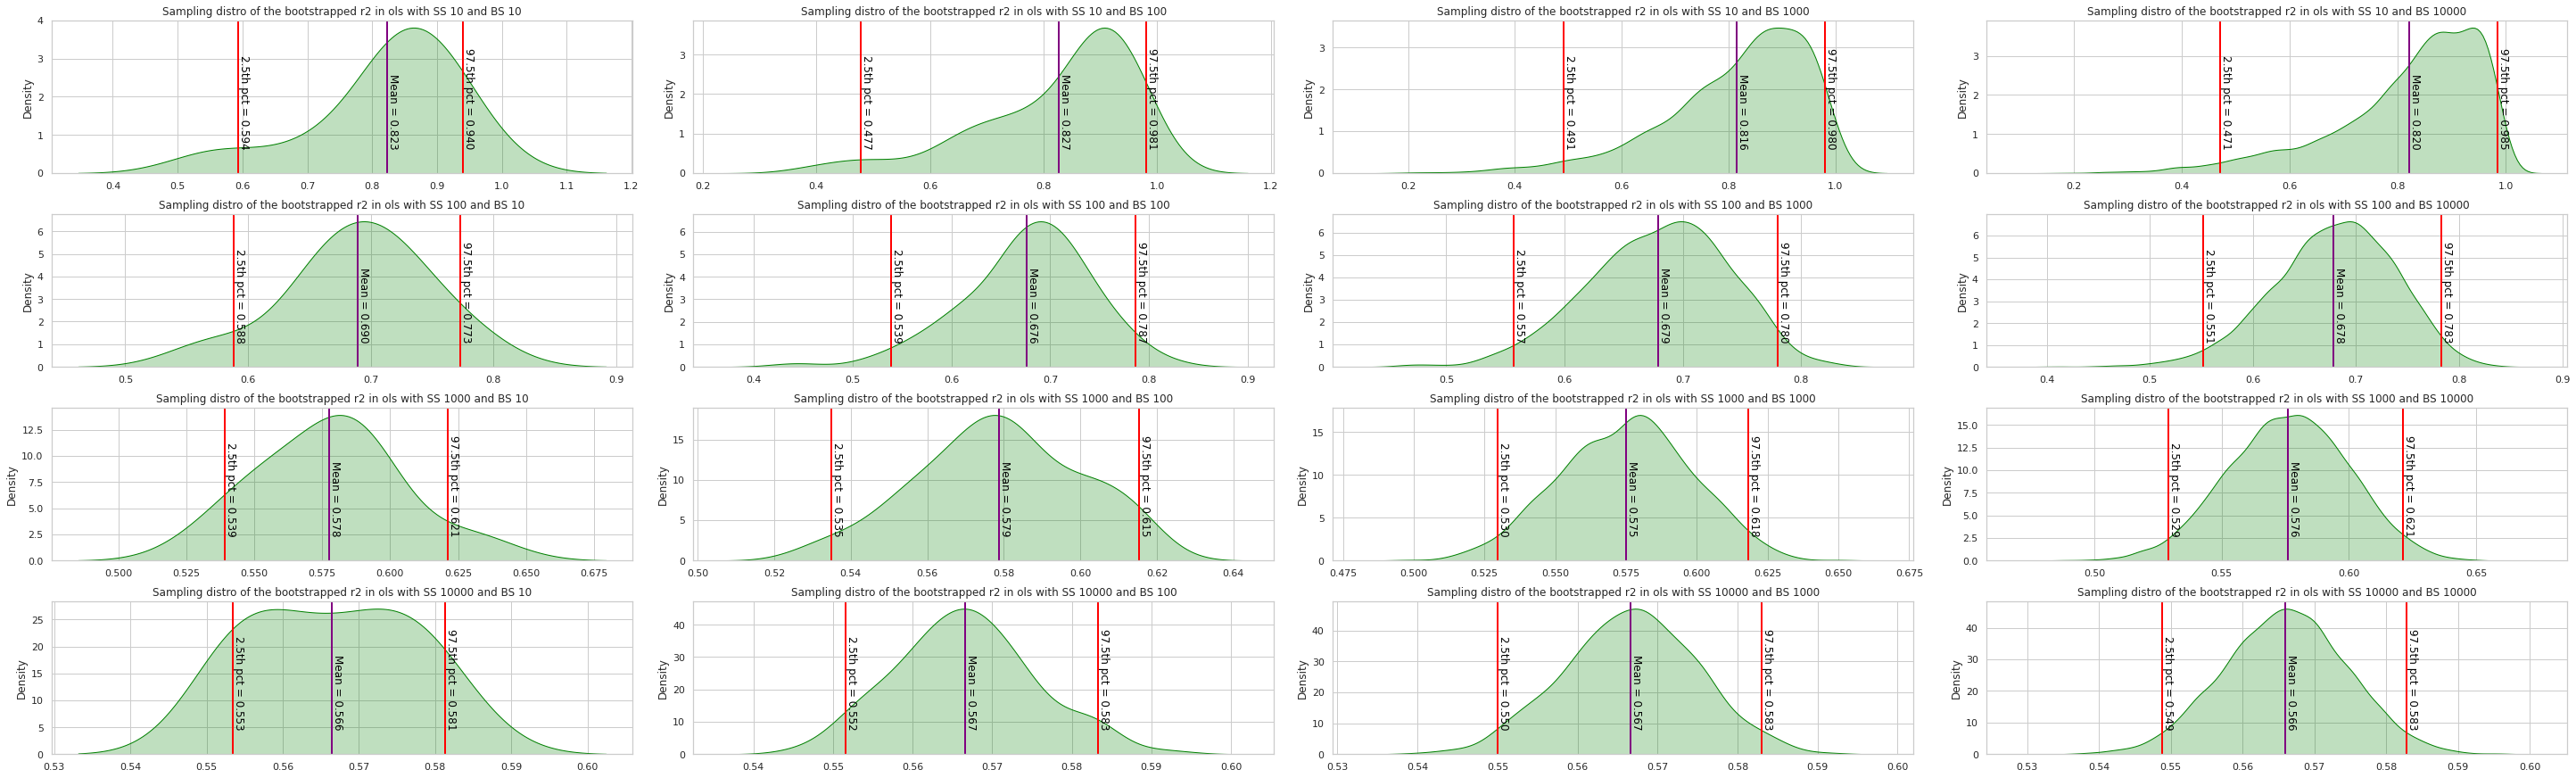

In [ ]:
kdeplot_estimator((40,12), 'ols_r2', estim_explainer, bootstrap_sample_dict, color = ['green', 'red', 'red', 'purple'], isFill='True')

In [ ]:
encompassing_df

,Sample_Size,Bs_Resample,Sample_Facts,Statistics/Estimator,Mean,0.025,0.975,Bias,SE,RMSE
0,10,10,-0.161202,xbar_sales,-0.007170,-0.369362,0.338267,0.154033,0.256199,0.298938
1,10,10,1.001819,std_sales,1.010253,0.712342,1.266459,0.008433,0.171889,0.172095
2,10,10,-0.080138,med_sales,-0.177628,-0.568197,0.095377,0.097490,0.220015,0.240647
3,10,10,0.812507,corr_sales_tanass,0.787943,0.668885,0.905996,0.024564,0.072348,0.076404
4,10,10,0.847240,corr_sales_tax,0.833621,0.550966,0.921150,0.013619,0.125189,0.125928
...,...,...,...,...,...,...,...,...,...,...
427,10000,10000,0.687596,corr_sales_tax,0.687609,0.672344,0.702430,0.000013,0.007758,0.007758
428,10000,10000,0.366927,corr_tanass_tax,0.366896,0.346224,0.386837,0.000030,0.010370,0.010370
429,10000,10000,0.328201,ols_tanass,0.327979,0.309946,0.346332,0.000222,0.009339,0.009342
430,10000,10000,0.568947,ols_tax,0.569021,0.549711,0.588632,0.000075,0.009972,0.009973


In [ ]:
xbar_sales_df = encompassing_df[encompassing_df['Statistics/Estimator'] == 'xbar_sales']
std_sales_df = encompassing_df[encompassing_df['Statistics/Estimator'] == 'std_sales']
med_sales_df = encompassing_df[encompassing_df['Statistics/Estimator'] == 'med_sales']
corr_sales_tanass_df = encompassing_df[encompassing_df['Statistics/Estimator'] == 'corr_sales_tanass']
corr_sales_tax_df = encompassing_df[encompassing_df['Statistics/Estimator'] == 'corr_sales_tax']
corr_tanass_tax_df = encompassing_df[encompassing_df['Statistics/Estimator'] == 'corr_tanass_tax']
ols_tanass_df = encompassing_df[encompassing_df['Statistics/Estimator'] == 'ols_tanass']
ols_tax_df = encompassing_df[encompassing_df['Statistics/Estimator'] == 'ols_tax']
ols_r2_df = encompassing_df[encompassing_df['Statistics/Estimator'] == 'ols_r2']

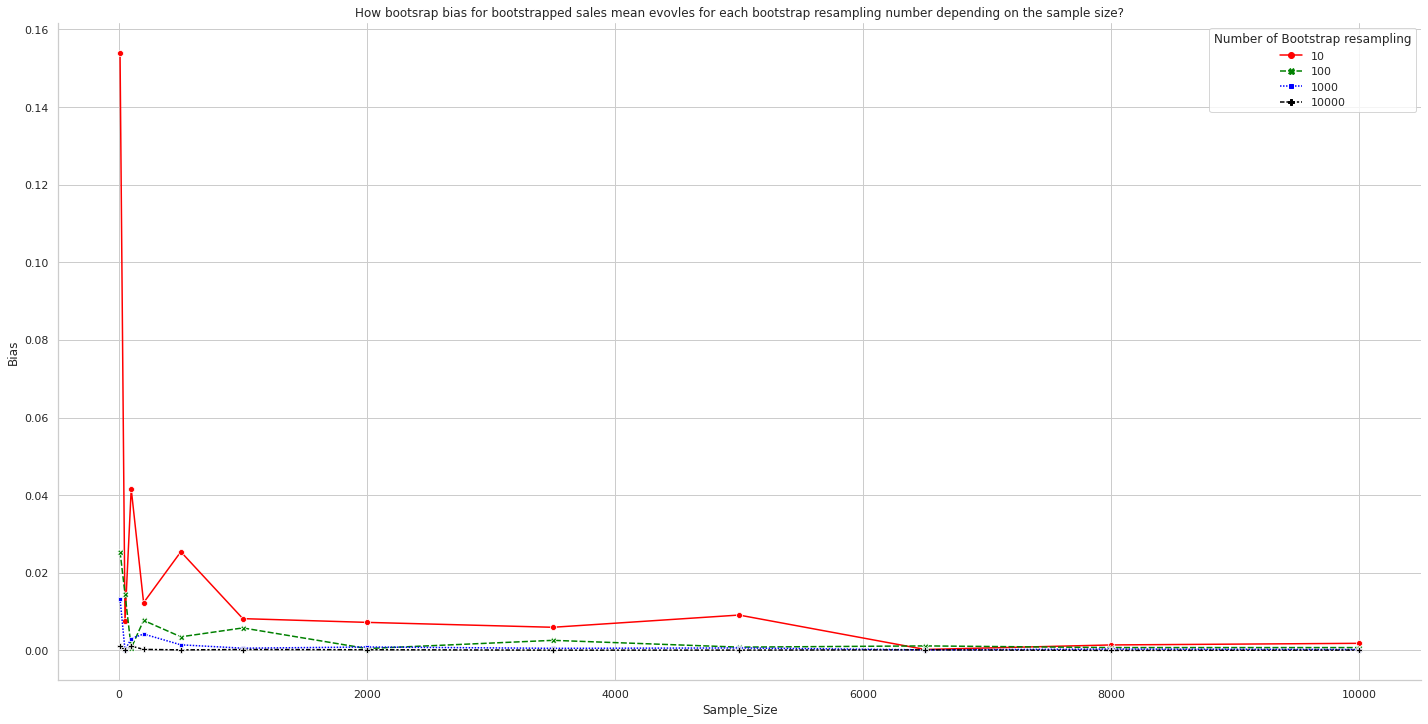

In [ ]:
g = sns.relplot(x="Sample_Size", y="Bias", hue = 'Bs_Resample', style = 'Bs_Resample', 
            palette = ['red','green','blue','black' ],  kind="line",  facet_kws={'legend_out': False}, 
            data=xbar_sales_df, markers=True, height = 10, aspect = 2).set(title = 'How bootsrap bias for bootstrapped sales mean evovles for each bootstrap resampling number depending on the sample size?')

leg = g.axes.flat[0].get_legend()
new_title = 'Number of Bootstrap resampling'
leg.set_title(new_title)
new_labels = ['10', '100', '1000', '10000']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show(g)

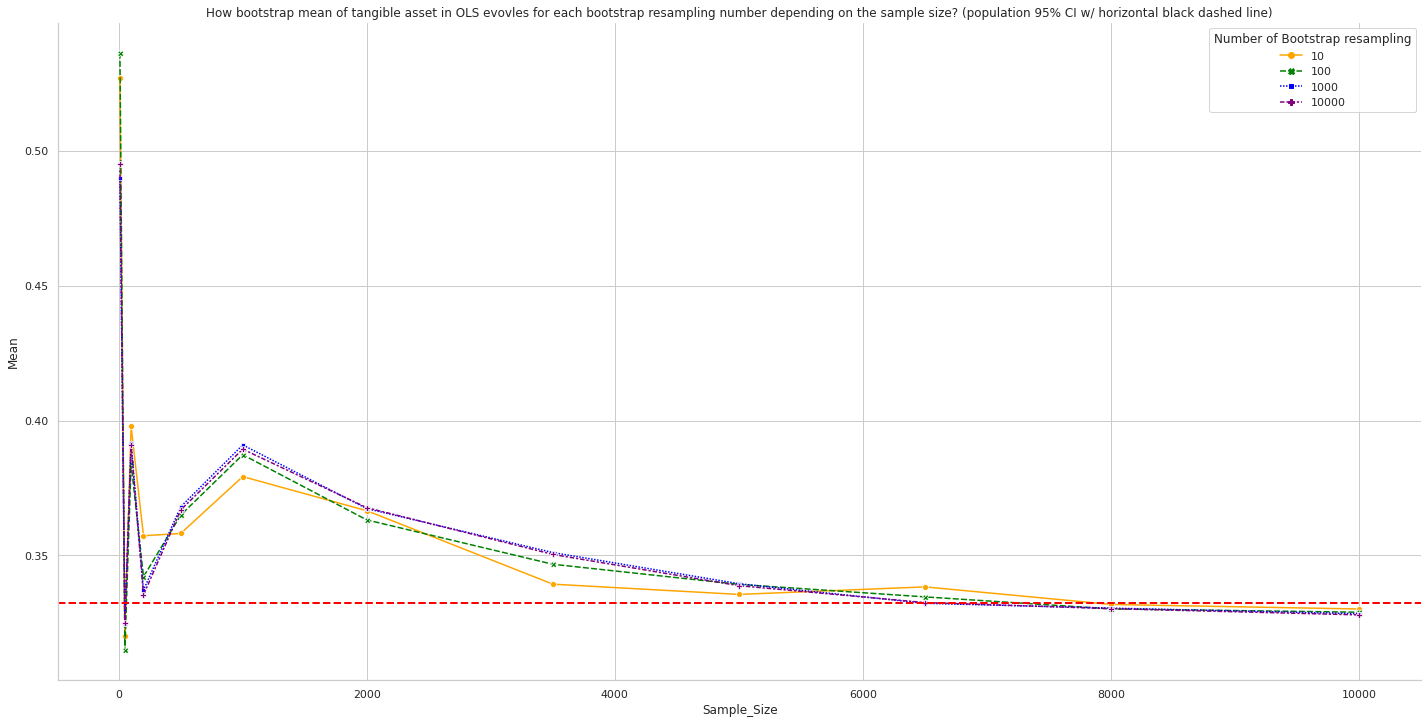

In [ ]:
g = sns.relplot(x="Sample_Size", y="Mean", hue = 'Bs_Resample', style = 'Bs_Resample', 
            palette = ['orange','green','blue','purple' ],  kind="line",  facet_kws={'legend_out': False}, 
            data=ols_tanass_df, markers=True, height = 10, aspect = 2).set(title = 'How bootstrap mean of tangible asset in OLS evovles for each bootstrap resampling number depending on the sample size? (population 95% CI w/ horizontal black dashed line)')

plt.axhline(0.3324,color = 'red',linewidth=2, ls = '--')

leg = g.axes.flat[0].get_legend()
new_title = 'Number of Bootstrap resampling'
leg.set_title(new_title)
new_labels = ['10', '100', '1000', '10000']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show(g)

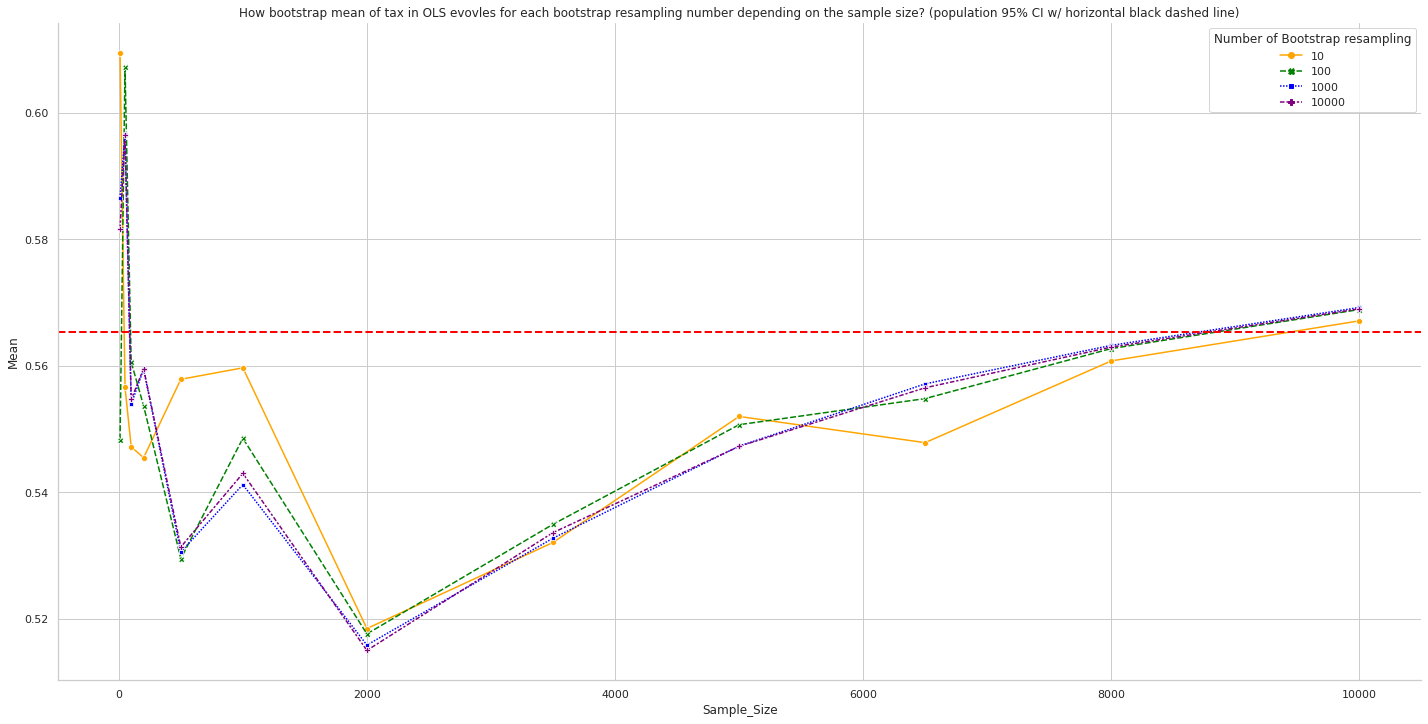

In [ ]:
g = sns.relplot(x="Sample_Size", y="Mean", hue = 'Bs_Resample', style = 'Bs_Resample', 
            palette = ['orange','green','blue','purple'],  kind="line",  facet_kws={'legend_out': False}, 
            data=ols_tax_df, markers=True, height = 10, aspect = 2).set(title = 'How bootstrap mean of tax in OLS evovles for each bootstrap resampling number depending on the sample size? (population 95% CI w/ horizontal black dashed line)')

plt.axhline(0.5654,color = 'red',linewidth=2, ls = '--')

leg = g.axes.flat[0].get_legend()
new_title = 'Number of Bootstrap resampling'
leg.set_title(new_title)
new_labels = ['10', '100', '1000', '10000']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show(g)

In [ ]:
def CI_mean_vals_into_a_col(df, bs_resample):
    concat_df = None
    for bs in bs_resample: 
        df_temp = df[df['Bs_Resample'] == bs][['Sample_Size', '0.025', 'Mean', '0.975']]
        dfm = df_temp.melt('Sample_Size', var_name = 'cols', value_name = 'values')
        dfm['Bs_Resample'] = bs

        concat_df = pd.concat([concat_df, dfm], ignore_index=True)

    return concat_df

df_ci_mean_ols_tanass = CI_mean_vals_into_a_col(ols_tanass_df, (10,100,1000,10000))
df_ci_mean_ols_tax = CI_mean_vals_into_a_col(ols_tax_df, (10,100,1000,10000))


In [ ]:
def plot_CI_ols(df, pop_val, title, bs_resample = [10, 100, 1000, 10000]):

    for i, bs in enumerate(bs_resample):
        g = sns.relplot(x="Sample_Size", y="values", hue = 'cols',  
        palette = ['green','blue','green'],  kind="line",  facet_kws={'legend_out': False}, 
        data=df[df['Bs_Resample'] == bs], markers=True, height = 5, aspect = 2.5).set(title = f'Mean and 95% CI values of the {title} when the # of bootstrapping resampling is {bs}')

        plt.axhline(pop_val,color = 'red',linewidth=2, ls = '--')

        leg = g.axes.flat[0].get_legend()
        new_title = '0.025, Mean, 0.975'
        leg.set_title(new_title)
        new_labels = ['0.025', 'Mean', '0.975']
        for t, l in zip(leg.texts, new_labels):
            t.set_text(l)

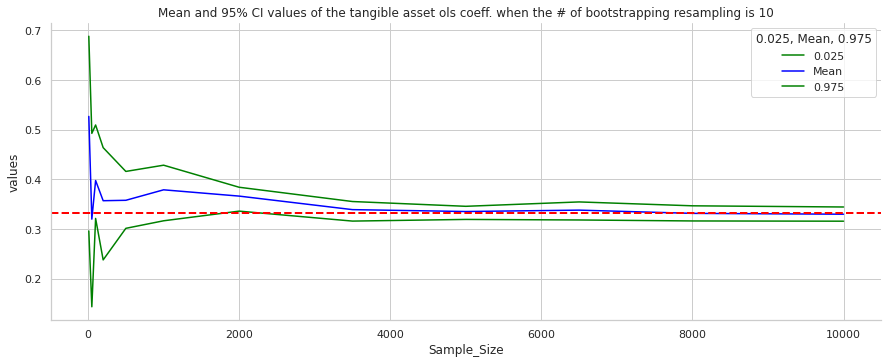

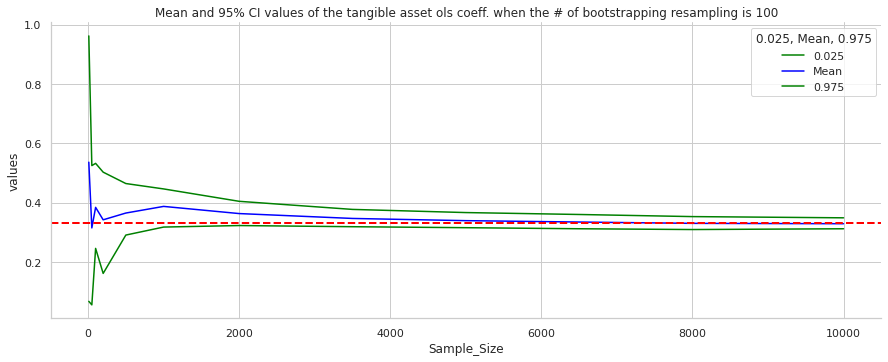

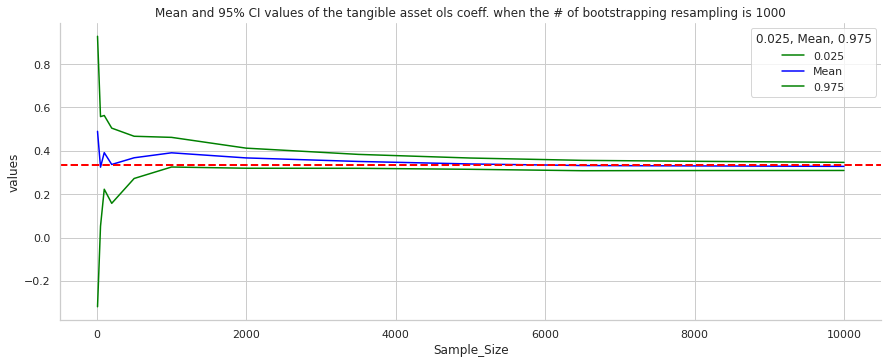

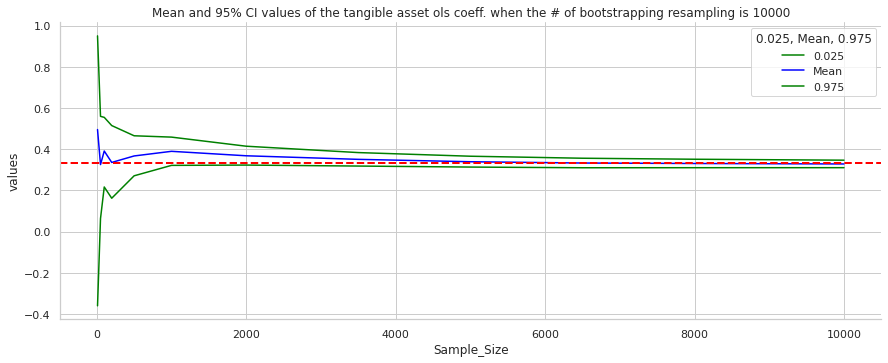

In [ ]:
plot_CI_ols(df_ci_mean_ols_tanass, pop_val = 0.3324, title = 'tangible asset ols coeff.')

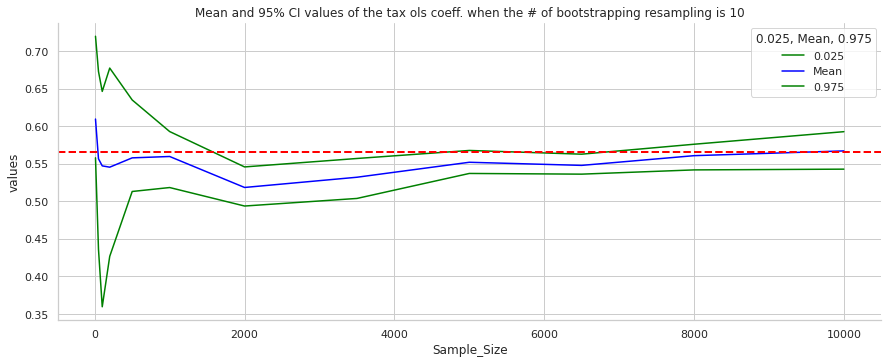

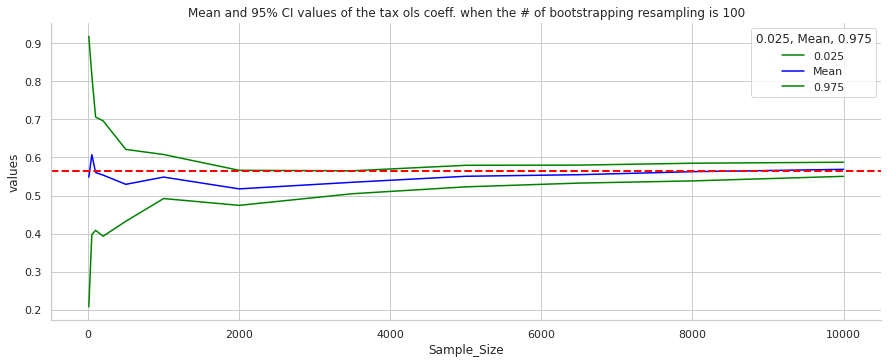

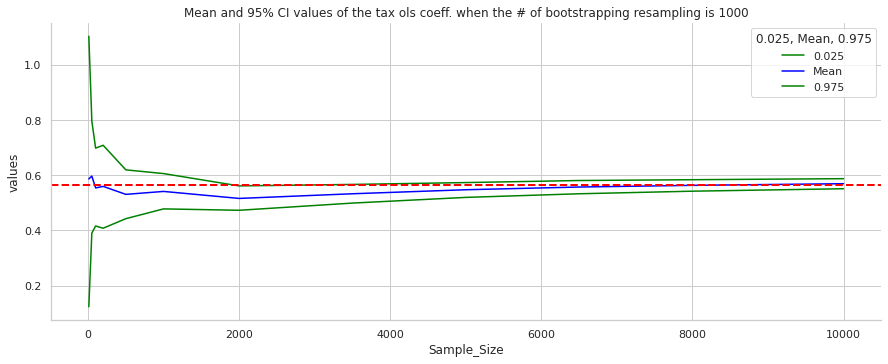

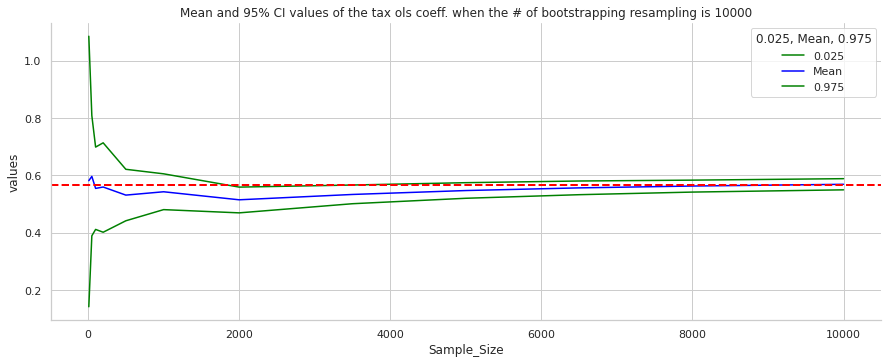

In [ ]:
plot_CI_ols(df_ci_mean_ols_tax, pop_val = 0.5654, title = 'tax ols coeff.')

In [ ]:
reps_array = encompassing_df['Bs_Resample'].unique()
encompassing_bs_dict = dict()

for bs in reps_array: 
    encompassing_bs_dict[bs] = encompassing_df[encompassing_df['Bs_Resample'] == bs]

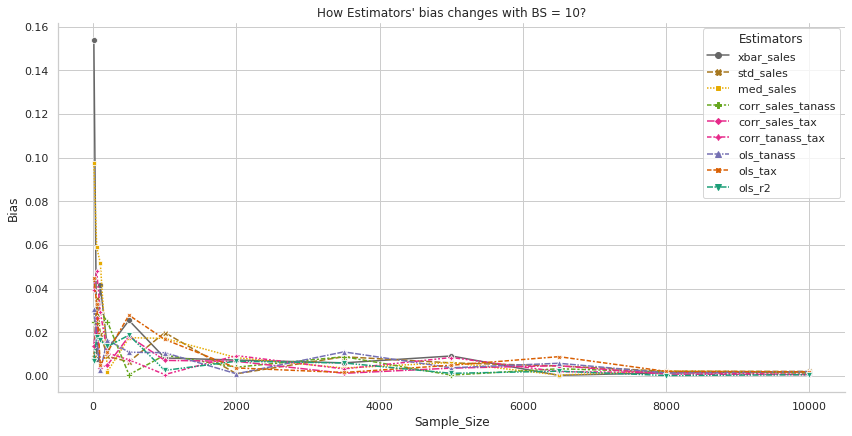

In [ ]:
g = sns.relplot(x="Sample_Size", y="Bias", hue = 'Statistics/Estimator', style = 'Statistics/Estimator', 
            palette = 'Dark2_r',
            kind="line",  facet_kws={'legend_out': False}, 
            data=encompassing_bs_dict[10], ci = None,
            markers=True, height = 6, aspect = 2).set(title = 'How Estimators\' bias changes with BS = 10?')

leg = g.axes.flat[0].get_legend()
new_title = 'Estimators'
leg.set_title(new_title)
new_labels = list(bs_df['Statistics/Estimator'])
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show(g)

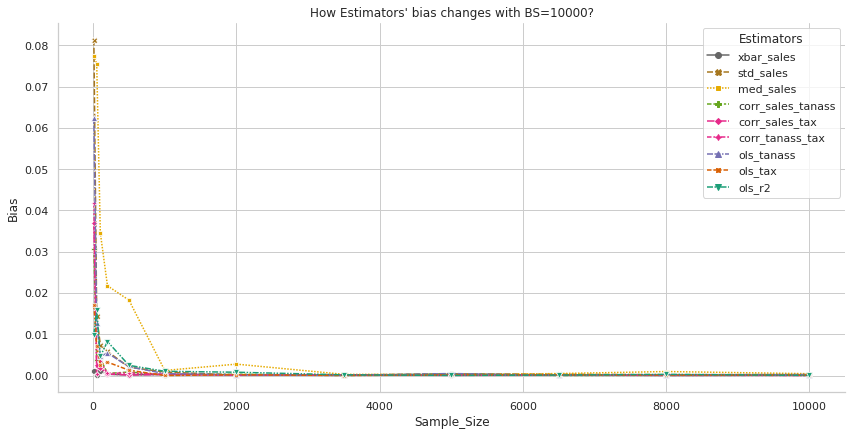

In [ ]:
g = sns.relplot(x="Sample_Size", y="Bias", hue = 'Statistics/Estimator', style = 'Statistics/Estimator', 
            palette = 'Dark2_r',
            kind="line",  facet_kws={'legend_out': False}, 
            data=encompassing_bs_dict[10000], ci = None,
            markers=True, height = 6, aspect = 2).set(title = 'How Estimators\' bias changes with BS=10000?')

leg = g.axes.flat[0].get_legend()
new_title = 'Estimators'
leg.set_title(new_title)
new_labels = list(bs_df['Statistics/Estimator'])
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show(g)